# Areas geojson

In [1]:
using GeoJSON, GLMakie, GeoMakie, Makie

In [ ]:
path = "./data/areas_geojson/areas_psmb.geojson"
jsonbytes = read(path)
fc = GeoJSON.read(jsonbytes)

println(fc[1])
fc[1].geometry[:]

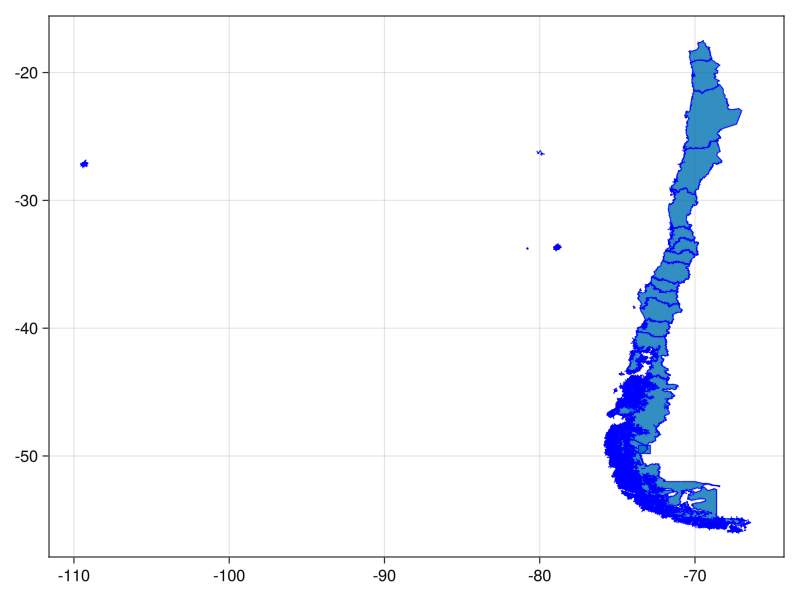

In [2]:
chile = download("https://raw.githubusercontent.com/fcortes/Chile-GeoJSON/master/Regional.geojson")

chile_geo = GeoJSON.read(read(chile, String))

fig = poly(chile_geo, strokecolor = :blue, strokewidth = 1)